<a href="https://colab.research.google.com/github/harsha361/new-rep/blob/main/lifeexpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
dataset=pd.read_csv('Life Expectancy Data.csv',sep=',')
dataset.info()
dataset.head()
print(dataset.columns)
dataset.dropna(subset=['Life expectancy '],inplace=True)
dataset.isna().sum()
dataset.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [30]:

from sklearn.preprocessing import LabelEncoder
dataset['Country']=LabelEncoder().fit_transform(dataset['Country'])
dataset['Status']=LabelEncoder().fit_transform(dataset['Status'])





0       1
1       1
2       1
3       1
4       1
       ..
2933    1
2934    1
2935    1
2936    1
2937    1
Name: Status, Length: 2928, dtype: int64

-0.021538108386786457

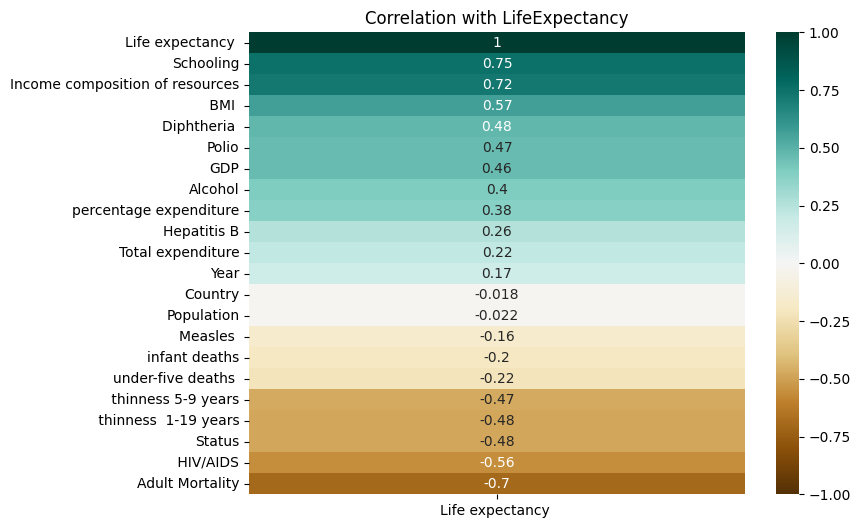

In [69]:
corrmatrix=dataset.corr()
targetcolumn='Life expectancy '
correlatedtarget=corrmatrix[targetcolumn].sort_values(ascending=False)
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(correlatedtarget.to_frame(),annot=True, cmap='BrBG', vmin=-1, vmax=1)
plt.title('Correlation with LifeExpectancy')
corr1=dataset['Life expectancy '].corr(dataset['Population'])
corr1





In [77]:
dataset.isna().sum()
dataset=dataset.drop(columns=['Population','Country','Hepatitis B'],axis=1)
dataset

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,1,44.3,723.0,27,4.36,0.000000,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,2003,1,44.5,715.0,26,4.06,0.000000,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,2002,1,44.8,73.0,25,4.43,0.000000,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,2001,1,45.3,686.0,25,1.72,0.000000,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [81]:

dataset.fillna(dataset.mean(),inplace=True)
dataset.isna().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [89]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.head(),y.head()
from sklearn.preprocessing import StandardScaler
